Entropic Regularization of Optimal Transport
============================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tours exposes the general methodology of regularizing the
optimal transport (OT) linear program using entropy. This allows to
derive fast computation algorithm based on iterative projections
according to a Kulback-Leiber divergence.

$\DeclareMathOperator{\KL}{KL}$
$\newcommand{\KLdiv}[2]{\KL\pa{#1 | #2}}$
$\newcommand{\KLproj}{P^{\tiny\KL}}$
$\def\ones{\mathbb{I}}$

In [1]:
from __future__ import division

import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt

from nt_toolbox.general import *
from nt_toolbox.signal import *
#from nt_solutions import optimaltransp_5_entropic as solutions

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

Entropic Regularization of Optimal Transport
--------------------------------------------
We consider two input histograms $p,q \in \Si_N$, where we denote the simplex in $\RR^N$
$$ \Si_{N} = \enscond{ p \in (\RR^+)^N }{ \sum_i p_i = 1 }.  $$
We consider the following discrete regularized transport

$$  W_\ga(p,q) = \umin{\pi \in \Pi(p,q)} \dotp{C}{\pi} - \ga E(\pi).  $$
where the polytope of coupling is defined as

$$ \Pi(p,q) = \enscond{\pi \in (\RR^+)^{N \times N}}{ \pi \ones = p, \pi^* \ones = q },  $$
and for $f \in (\RR^+)^{P}$ for some $P > 0$, we define its entropy as
$$ E(f) = - \sum_{i=1}^N f_i ( \log(f_i) - 1). $$


When $\ga=0$ one recovers the classical (discrete) optimal transport.
We refer to the monograph [Villani](#biblio) for more details about OT.
The idea of regularizing transport to allows for faster computation is
introduced in [Cuturi](#biblio).



Here the matrix $C \in (\RR^+)^{N \times N} $ defines the ground cost, i.e.
$C_{i,j}$ is the cost of moving mass from a bin indexed by $i$ to a bin indexed by $j$.


The regularized transportation problem can be re-written as a projection
$$ W_\ga(p,q) = \ga \umin{\pi \in \Pi(p,q)} \KLdiv{\pi}{\bar \pi}
	\qwhereq
	\bar\pi_{i,j} = e^{ -\frac{C_{i,j}}{\ga} }  $$
of $\bar\pi$ according to the Kullback-Leibler divergence. The Kullback-Leibler divergence between $f, \bar f \in (\RR^+)^P$ is
$$ \KLdiv{f}{\bar f} = \sum_{i=1}^P f_{i} \pa{ \log\pa{ \frac{f_i}{\bar f_i} } - 1}. $$
With a slight abuse of notation, we extend these definitions for vectors $\pi \in \RR^{N \times N}$ (and also higher $d$-dimensional tensor arrays), so that $P=N^2$ (or more generally $P=N^d$) by replacing the sum over elements $f_i$ by $\pi_{i,j}$ with $i,j=1,\ldots,N$.


Given a convex set $\Cc \subset \RR^N$, the projection according to the Kullback-Leiber divergence is defined as

$$ \KLproj_\Cc(\bar f) = \uargmin{ f \in \Cc } \KLdiv{f}{\bar f}. $$

Iterative Bregman Projection Algorithm
--------------------------------------
Given affine constraint sets $ (\Cc_1,\ldots,\Cc_K) $, we aim at computing
$$   \KLproj_\Cc(\bar \pi) \qwhereq \Cc = \Cc_1 \cap \ldots \cap \Cc_K. $$


This can be achieved, starting by $\pi_0=\bar\pi$, by iterating
$$ \forall \ell \geq 0, \quad \pi_{\ell+1} =  \KLproj_{\Cc_\ell}(\pi_\ell), $$
where the index of the constraints should be understood modulo $K$,
i.e. we set $ \Cc_{\ell+K}=\Cc_\ell $.


One can indeed show that $\pi_\ell \rightarrow \KLproj_\Cc(\bar \pi)$.
We refer to [BauschkeLewis](#biblio) for more details about this
algorithm and its extension to compute the projection on the intersection of
convex sets (Dikstra algorithm).

Iterative Projection for Regularized Transport
----------------------------------------------
We can re-cast the regularized optimal transport problem within this
framework by introducing
$$ \Cc_1 = \enscond{\pi \in (\RR^+)^{N \times N} }{\pi \ones = p}
\qandq
 \Cc_2 = \enscond{\pi \in (\RR^+)^{N \times N} }{\pi^* \ones = q}$$


The KL projection on $\Cc_1$ sets are easily computed by divisive
normalization of rows. Indeed, denoting
$ \pi = \KLproj_{\Cc_1}(\bar \pi) $, one has
$$ \forall (i,j), \quad
  \pi_{i,j} = \frac{ p_i \bar\pi_{i,j} }{ \sum_{s} \bar\pi_{i,s} } $$
and similarely for $\KLproj_{\Cc_2}(\bar \pi) $ by replacing rows by
colums.


Size $N$ of the histograms.

In [2]:
N = 200

Define $\KLproj_{\Cc_1}$.

In [3]:
ProjC1 = lambda pi,p: pi*np.transpose(np.tile(p/[max(e,1e-10) for e in np.sum(pi,1)],(N,1)))

Define $\KLproj_{\Cc_2}$.

In [4]:
ProjC2 = lambda pi, q: pi*np.tile(np.transpose(q)/[max(e,1e-10) for e in np.sum(pi,0)],(N,1))

We use here a 1-D square Euclidean metric.

In [5]:
x = np.arange(0,N)/N
y = np.copy(x)
Y = np.tile(y,(N,1))
X = np.transpose(Y)
C = abs(X-Y)**2

Define the histogram $p,q$

In [6]:
Gaussian = lambda x0,sigma: np.exp(-(x-x0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)

x0 = .2
y0 = .8
sigma = .07

p = Gaussian(x0, sigma)
q = Gaussian(y0, sigma)

Add some minimal mass and normalize.

In [7]:
vmin = .02
p = normalize(p + max(p)*vmin)
q = normalize(q + max(q)*vmin)

Display them.

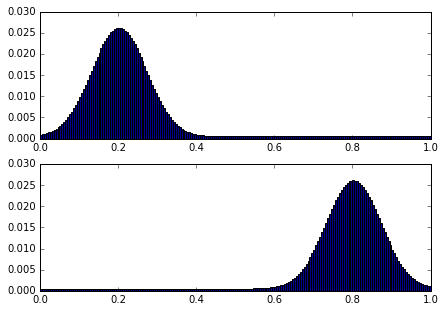

In [8]:
plt.figure(figsize = (7,5))

plt.subplot(2, 1, 1)
plt.bar(x, p, width = 1/len(x), color = "darkblue")
plt.subplot(2, 1, 2)
plt.bar(y, q, width = 1/len(x), color = "darkblue")

plt.show()

__Exercise 1__

Perform the iterations, and display the decay of the errors
$$ \norm{\pi_\ell \ones - p}
 \qandq
 \norm{\pi_\ell^* \ones - q} $$
in log scale. 

In [9]:
#solutions.exo1()

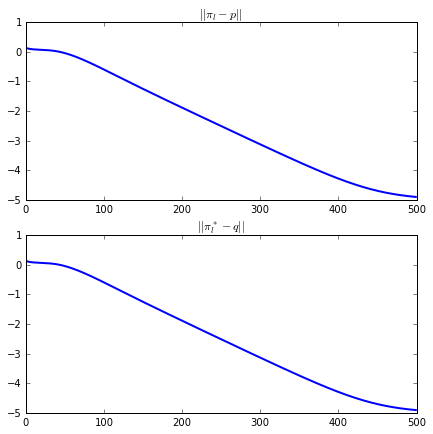

In [10]:
## Insert your code here.
from numpy import linalg

u = np.ones(N)
niter = 500
gamma = .001
pi = np.exp(-C/gamma)
E1 = []
E2 = []
for i in range(niter):
    pi = ProjC1(pi, p)
    E2 = E2 + [linalg.norm(np.dot(np.transpose(pi),u)-q)/linalg.norm(q)]
    pi = ProjC2(pi, q)
    E1 = E1 + [linalg.norm(np.dot(pi,u)-p)/linalg.norm(p)]

plt.figure(figsize = (7,7))

plt.subplot(2,1,1)
plt.title("$||\pi_l -p||$")
plt.plot(np.log10(np.asarray(E1) + 1e-5), linewidth = 2)

plt.subplot(2,1,2)
plt.title("$||\pi_l^* -q||$")
plt.plot(np.log10(np.asarray(E2) + 1e-5), linewidth = 2)

plt.show()

Display the optimal $\pi$.

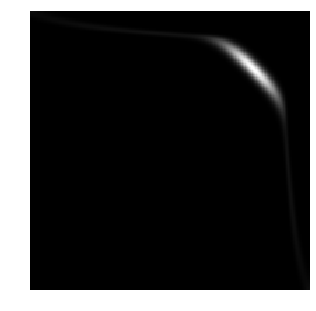

In [11]:
plt.figure(figsize = (5,5))
imageplot(pi)

For visualization purpose, to more clearly see the optimal map, do a
normalization.

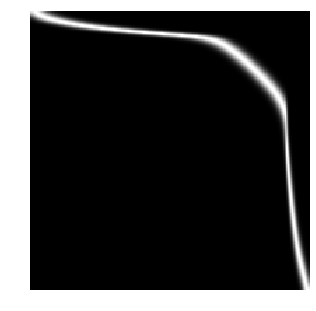

In [12]:
normalizeMax = lambda pi: pi/np.max(pi,0)
plt.figure(figsize = (5,5))
imageplot(normalizeMax(pi))

__Exercise 2__

Display the transport map for several values of $\gamma$.

In [13]:
#solutions.exo2()

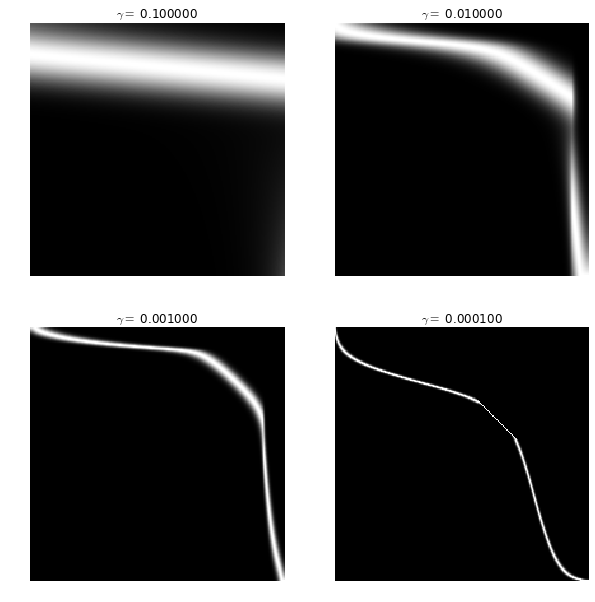

In [14]:
## Insert your code here.

plt.figure(figsize = (10,10))

glist = [.1,.01,.001,.0001]
niter = 500
for ig in range(len(glist)):
    gamma = glist[ig]
    pi = np.exp(-C/gamma)
    for i in range(niter):
        pi = ProjC2(ProjC1(pi, p), q)
    imageplot(normalizeMax(pi),"$\gamma =$ %f" %gamma,[2,2,ig+1])

Bibliography
------------
<html><a name="biblio"></a></html>


* [Villani] Villani, C. (2009). Optimal transport: old and new, volume 338. Springer Verlag.
* [Cuturi] Cuturi, M. (2013). Sinkhorn distances: Lightspeed computation of optimal transport. In Burges, C. J. C., Bottou, L., Ghahramani, Z., and Weinberger, K. Q., editors, Proc. NIPS, pages 2292-2300.
* [AguehCarlier] Agueh, M. and Carlier, G. (2011). Barycenters in the Wasserstein space. SIAM J. on Mathematical Analysis, 43(2):904-924.
* [CuturiDoucet] Cuturi, M. and Doucet, A. (2014). Fast computation of wasserstein barycenters. In Proc. ICML.
* [BauschkeLewis] H. H. Bauschke and A. S. Lewis. Dykstra's algorithm with Bregman projections: a convergence proof. Optimization, 48(4):409-427, 2000.